In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['C09.SI', 'U14.SI', '9CI.SI', 'F17.SI']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

# Create a dictionary to store stock data
stock_data = {}

for stock in tech_list:
    # Download stock data and store it in the dictionary
    stock_data[stock] = yf.download(stock, start, end)

# Add a company_name column to each DataFrame
company_names = ["CDL", "UOL", "CAPLAND", "GUOCO"]

for stock, com_name in zip(tech_list, company_names):
    stock_data[stock]["company_name"] = com_name

# Concatenate the DataFrames into one DataFrame (df)
df = pd.concat(stock_data.values(), axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
CDL = df[df['company_name'] == 'CDL']
UOL = df[df['company_name'] == 'UOL']
CAPLAND = df[df['company_name'] == 'CAPLAND']
GUOCO = df[df['company_name'] == 'GUOCO']

company_list = [CDL, UOL, CAPLAND, GUOCO]

## Closing Price Analysis

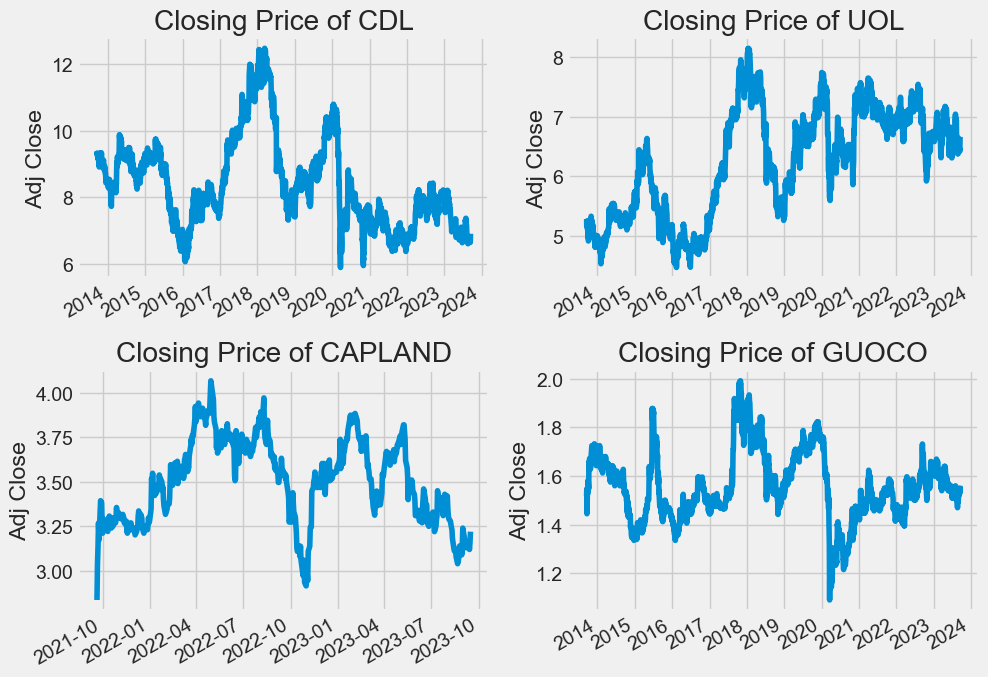

In [8]:
## historical view of the closing price
plt.figure(figsize=(10, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_names[i - 1]}")
    
plt.tight_layout()

## Simple Moving Average

C:\Users\rutsm\AppData\Local\Temp\ipykernel_29544\1425022189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
C:\Users\rutsm\AppData\Local\Temp\ipykernel_29544\1425022189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
C:\Users\rutsm\AppData\Local\Temp\ipykernel_29544\1425022189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

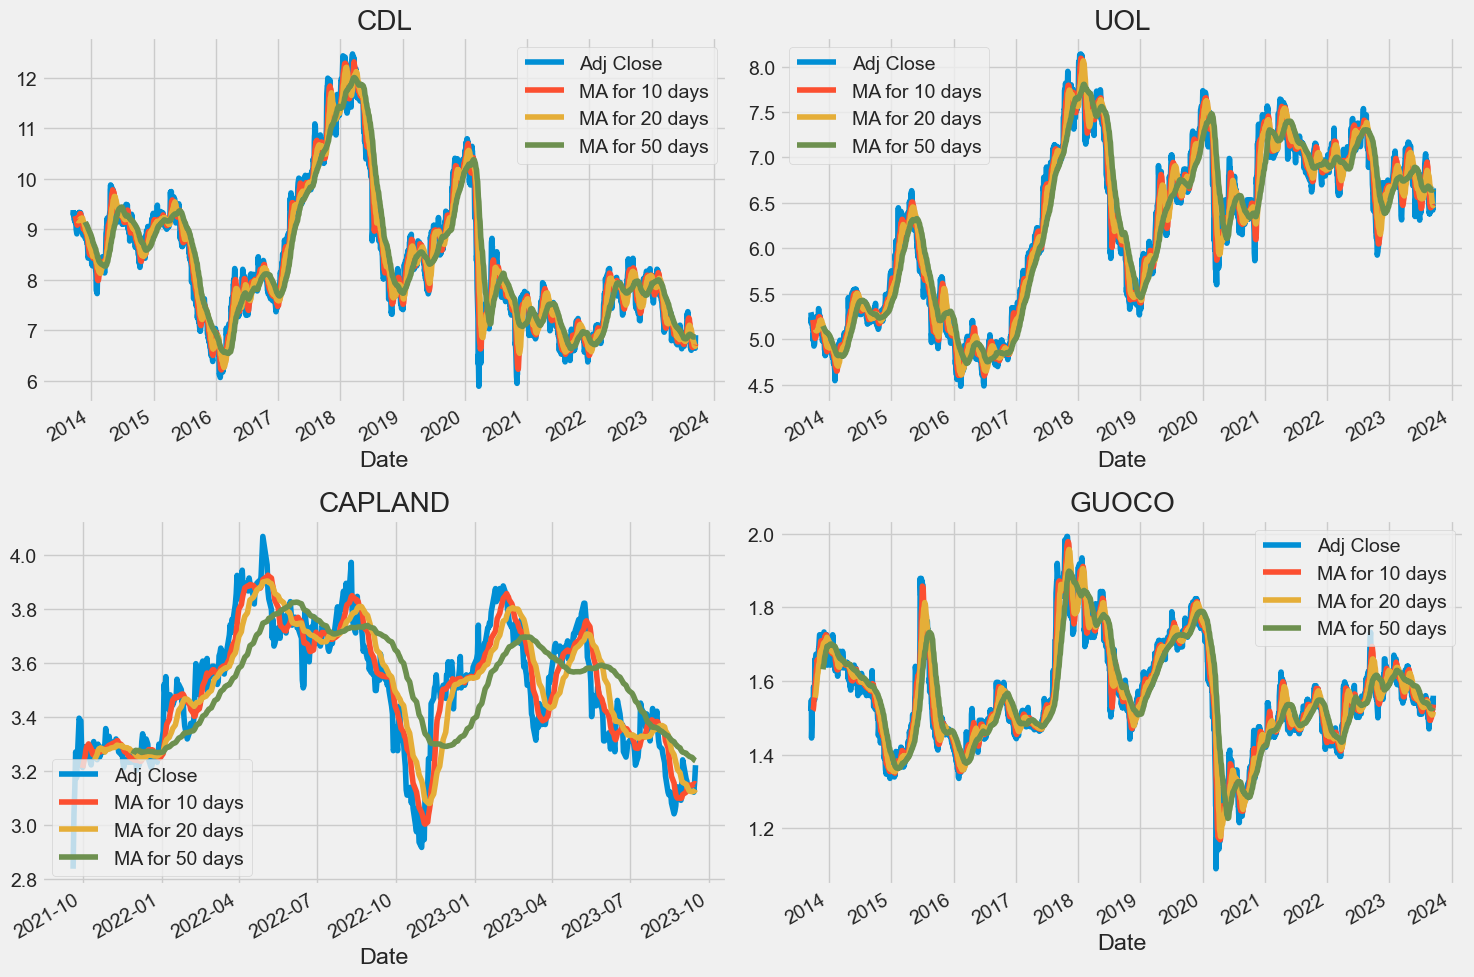

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

CDL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('CDL')

UOL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('UOL')

CAPLAND[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('CAPLAND')

GUOCO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('GUOCO')

fig.tight_layout()

## Daily Returns On Stock (AVG)

C:\Users\rutsm\AppData\Local\Temp\ipykernel_29544\1901745432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Adj Close'].pct_change()
C:\Users\rutsm\AppData\Local\Temp\ipykernel_29544\1901745432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Adj Close'].pct_change()
C:\Users\rutsm\AppData\Local\Temp\ipykernel_29544\1901745432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

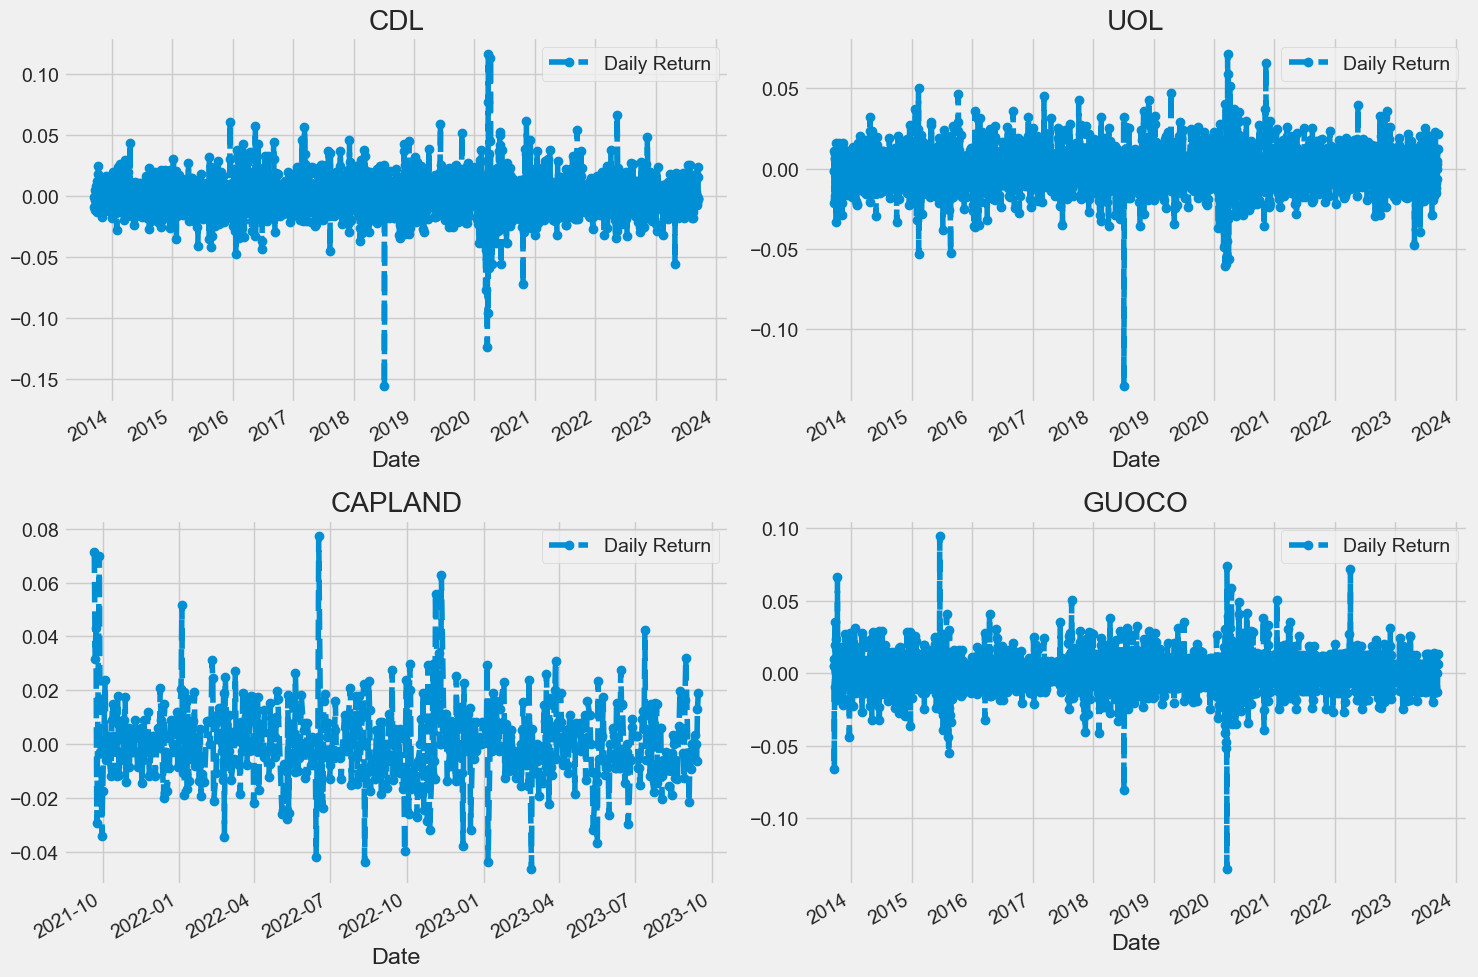

In [10]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

CDL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('CDL')

UOL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('UOL')

CAPLAND['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('CAPLAND')

GUOCO['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('GUOCO')

fig.tight_layout()

## Distribution Plot Of Returns

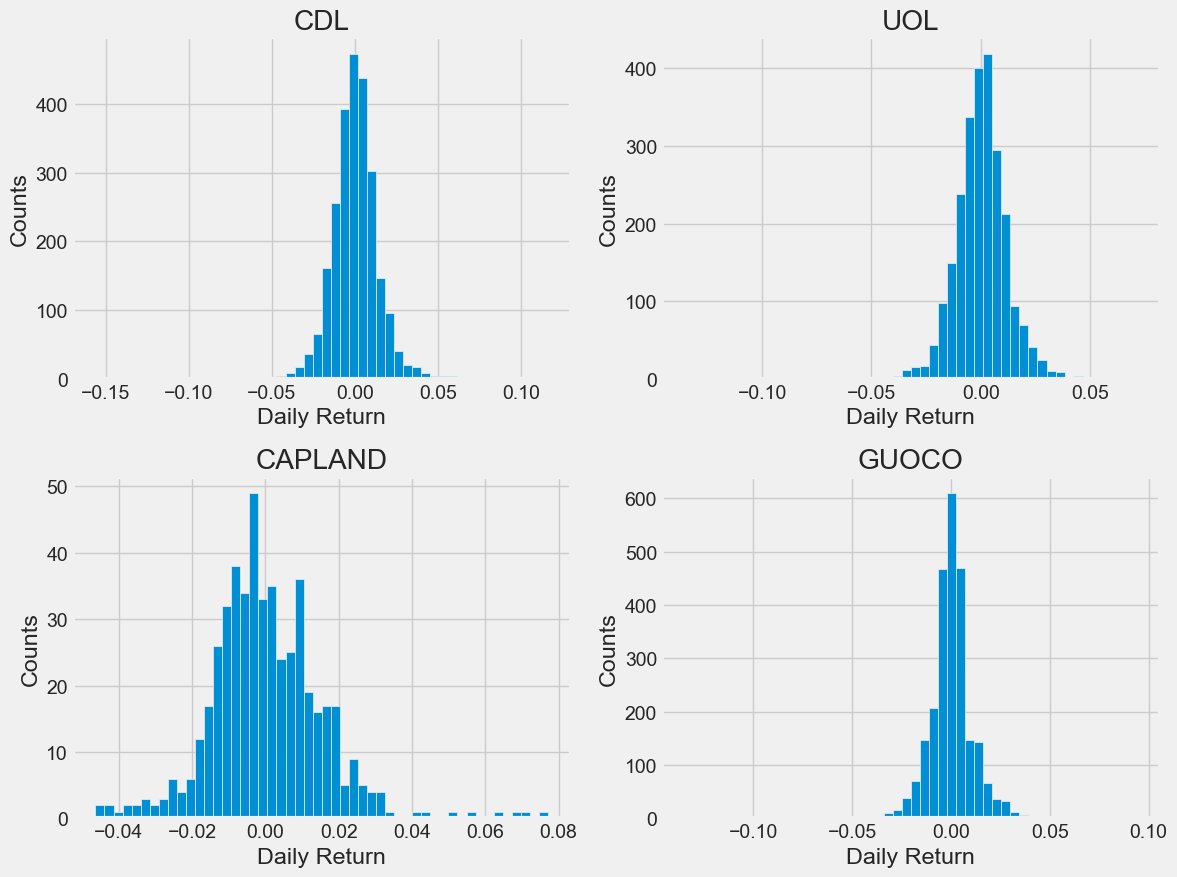

In [11]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_names[i - 1]}')
    
plt.tight_layout()

## Correlation Plot

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.columns = ['CAPLAND', 'CDL', 'GUOCO', 'UOL']
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,CAPLAND,CDL,GUOCO,UOL
Date,,,,
2013-09-16,NaN,NaN,NaN,NaN
2013-09-17,NaN,-0.009488,0.004831,-0.001529
2013-09-18,NaN,-0.000958,0.004808,-0.021440
2013-09-19,NaN,0.004794,0.009569,0.010955
2013-09-20,NaN,-0.000954,-0.066351,-0.001548


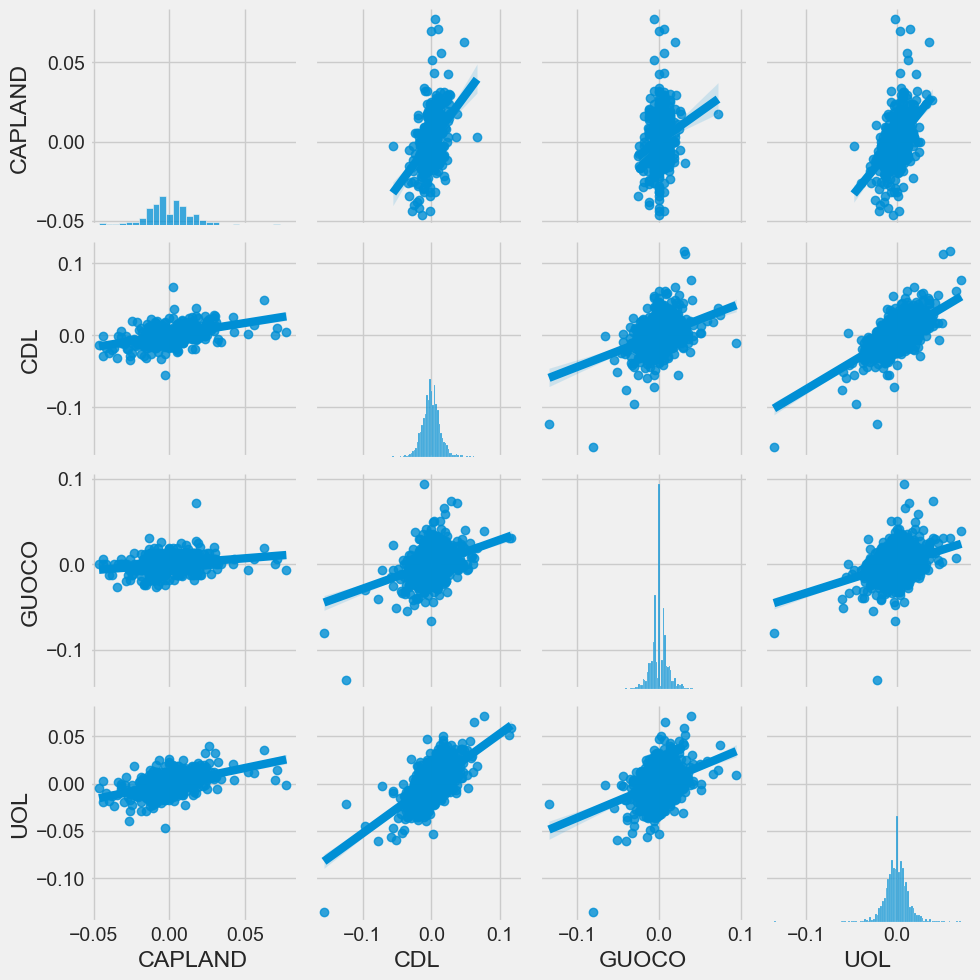

In [13]:
sns.pairplot(tech_rets, kind='reg')

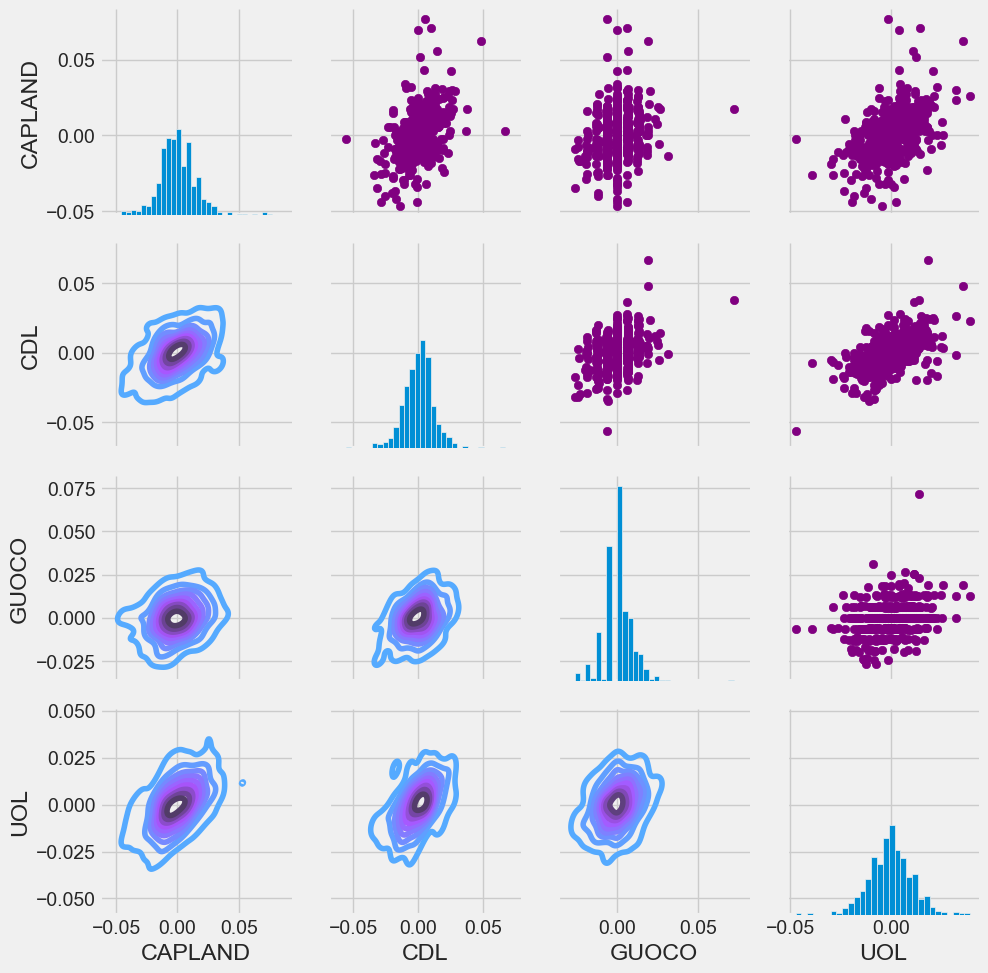

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

In [15]:
stock_return_corr = tech_rets.corr()

fig = px.imshow(stock_return_corr,
                color_continuous_scale='RdBu',
                labels=dict(x="Features", y="Features", color="Correlation"),
                title="Correlation Heatmap")

# Create annotations for correlation values
annotations = []
for i in range(len(stock_return_corr)):
    for j in range(len(stock_return_corr)):
        annotations.append(
            dict(
                x=stock_return_corr.columns[i],
                y=stock_return_corr.columns[j],
                text=str(round(stock_return_corr.iloc[i, j], 2)),
                showarrow=False,
                font=dict(color='white')
            )
        )

# Add annotations to the heatmap
fig.update_layout(annotations=annotations)

# Update layout
fig.update_layout(
    width=1000,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
closing_price_corr = closing_df.corr()

fig = px.imshow(stock_return_corr,
                color_continuous_scale='RdBu',
                labels=dict(x="Features", y="Features", color="Correlation"),
                title="Correlation Heatmap")

# Create annotations for correlation values
annotations = []
for i in range(len(stock_return_corr)):
    for j in range(len(stock_return_corr)):
        annotations.append(
            dict(
                x=stock_return_corr.columns[i],
                y=stock_return_corr.columns[j],
                text=str(round(stock_return_corr.iloc[i, j], 2)),
                showarrow=False,
                font=dict(color='white')
            )
        )

# Add annotations to the heatmap
fig.update_layout(annotations=annotations)

# Update layout
fig.update_layout(
    width=1000,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
)

fig.show()

## Investment Risk

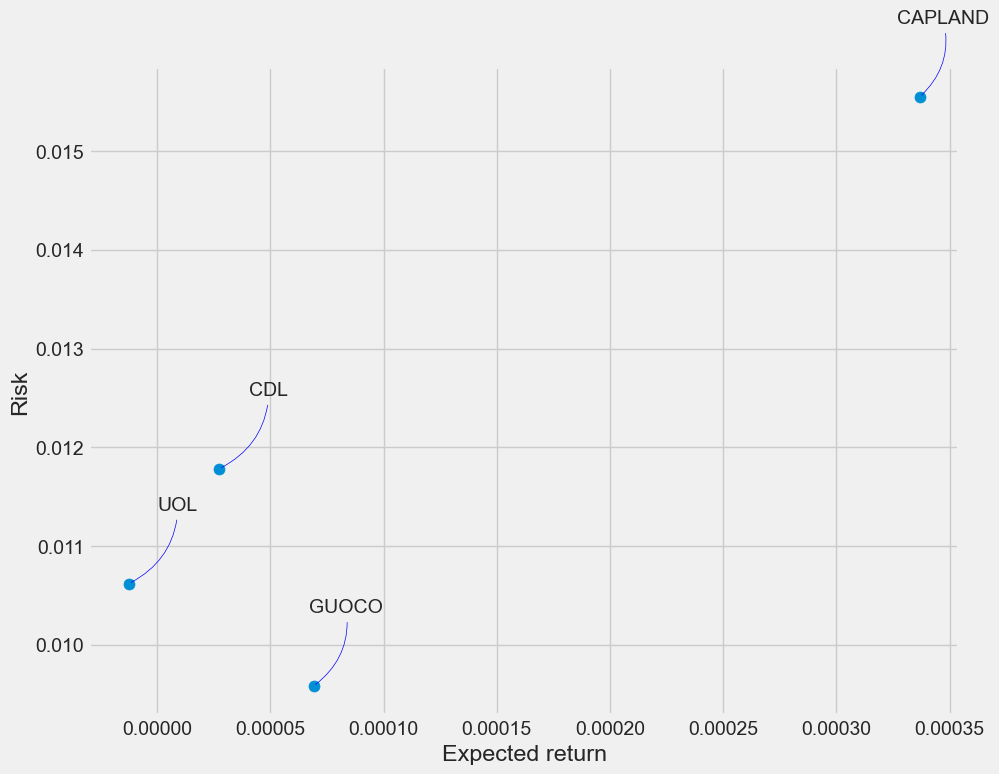

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Calculate moving averages
windows = [5, 10, 15, 20, 30, 60]
for window in windows:
    CDL[f'MA_{window}'] = CDL['Close'].rolling(window=window).mean()

# Reset the index to make 'Date' a regular column (optional)
# df.reset_index(inplace=True)

# Create a line chart with Plotly Express
fig = px.line(CDL, x=CDL.index, y=CDL.columns[-len(windows):], labels={'variable': 'Moving Average'})
fig.update_layout(title='Moving Averages of Close Price', xaxis_title='Date', yaxis_title='Price')
fig.show()

C:\Users\rutsm\AppData\Local\Temp\ipykernel_21172\361746309.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
from datetime import datetime, timedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


recent = pd.to_datetime('2021-01-01')
risk = pd.DataFrame(columns=['Min', 'Max', 'Mean', 'Variance', 'Standard Deviation', 'Ad-Fuller Value', 'Stationarity', 'Growth Trends', 'Loss Trends', 'Longest Growth', 'Longest Loss'])

for idx, company in enumerate(company_list):

    recent_data = company[company.index >= recent]

    var = recent_data['Close'].var()
    std = recent_data['Close'].std()
    mean = recent_data['Close'].mean()
    min = recent_data['Close'].min()
    max = recent_data['Close'].max()
    adf = round(adfuller(recent_data['Close'])[1], 2)
    if adf > 0.05:
        stationary = 'False'
    else:
        stationary = 'True'

    
    close = company['Close'].tolist()
    up_trends = 0
    down_trends = 0
    current_trend = None

    # Initialize variables to track the longest up and down trends
    longest_up_trend = 0
    longest_down_trend = 0

    # Initialize variables to count the current up and down trends
    current_up_trend = 0
    current_down_trend = 0

    for i in range(1, len(close)):
        if close[i] > close[i - 1]:  # If the current value is greater than the previous value
            current_up_trend += 1
            current_down_trend = 0  # Reset the down trend counter
            if current_trend != "up":  # If the current trend is not already an up trend
                up_trends += 1
                current_trend = "up"
        elif close[i] < close[i - 1]:  # If the current value is less than the previous value
            current_down_trend += 1
            current_up_trend = 0  # Reset the up trend counter
            if current_trend != "down":  # If the current trend is not already a down trend
                down_trends += 1
                current_trend = "down"
        else:  # If the current value is equal to the previous value
            current_up_trend = 0
            current_down_trend = 0

        # Update the longest trends
        if current_up_trend > longest_up_trend:
            longest_up_trend = current_up_trend
        if current_down_trend > longest_down_trend:
            longest_down_trend = current_down_trend


    risk.loc[company_names[idx]] = [min, max, mean, var, std, adf, stationary, up_trends, down_trends, longest_up_trend, longest_down_trend]

In [44]:
risk

,Min,Max,Mean,Variance,Standard Deviation,Ad-Fuller Value,Stationarity,Growth Trends,Loss Trends,Longest Growth,Longest Loss
CDL,6.58,8.68,7.484462,0.273669,0.523134,0.14,False,627,627,11,10
UOL,5.95,7.99,7.059308,0.147240,0.383719,0.07,False,596,596,8,10
CAPLAND,2.95,4.23,3.599987,0.066396,0.257674,0.17,False,119,118,5,9
GUOCO,1.45,1.80,1.594006,0.003686,0.060715,0.02,True,566,565,6,7
